In [ ]:
Merging 2 datasets and applied SVM classifier 

# Topics discussed 
1. Reading 2 datasets
2. removing/dropping extra columns
3. renaming column names if required
4. Merging 2 datasets
5. Selection of unwanted columns
6. Identifying Unwanted rows
7. Remove Unwanted columns
8. divide dataset Train/Test dataset
9. Modeling (SVM)
10. Results

## Introduction:
In this notebook, we have taken 2 different datasets from Kaggle, one datset having record of Epileptic patients and another is of normal persons. First we have merged both datasets, identifying required columns, splitting merged dataset into Test dataset and training dataset and then applied the SVM classifier to classify data as epileptic or non-epileptic data to demonstrate the evaluation metrics. 


In [1]:
import pandas as pd
import numpy as np


# Reading First DataSet

In [2]:
df=pd.read_csv('epilepsy.csv')

In [3]:
df

,Unnamed: 0,AF3,AF4,F3,F4,F7,F8,FC5,FC6,O1,...,CQ_P7,CQ_P8,CQ_F4,CQ_AF3,CQ_FC5,CQ_O1,CQ_T8,CQ_F8,CQ_DRL,Class
0,1,4426.153846,3994.871795,4408.205128,3847.692308,4690.256410,3895.897436,4702.051282,3914.871795,4049.743590,...,4,4,4,4,4,4,4,4,4,2
1,2,4420.512821,3986.666667,4394.358974,3836.923077,4678.461538,3886.666667,4696.410256,3910.769231,4054.358974,...,4,4,4,4,4,4,4,4,4,2
2,3,4413.846154,3986.153846,4386.666667,3831.794872,4654.871795,3881.025641,4690.769231,3908.205128,4066.666667,...,4,4,4,4,4,4,4,4,4,2
3,4,4407.692308,3984.615385,4384.102564,3832.820513,4644.615385,3883.076923,4686.153846,3910.256410,4063.076923,...,4,4,4,4,4,4,4,4,4,2
4,5,4407.179487,3978.974359,4382.564103,3832.307692,4647.692308,3878.974359,4685.641026,3903.076923,4057.948718,...,4,4,4,4,4,4,4,4,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38523,38524,4049.230769,3826.666667,4003.589744,3550.256410,4229.230769,3572.307692,4376.923077,3721.025641,4197.435897,...,4,4,4,4,4,4,4,4,4,2
38524,38525,4056.410256,3832.307692,4002.051282,3554.358974,4230.769231,3575.897436,4375.897436,3724.102564,4198.974359,...,4,4,4,4,4,4,4,4,4,2
38525,38526,4060.512821,3835.897436,4006.666667,3561.538462,4233.846154,3574.871795,4367.692308,3726.153846,4199.487179,...,4,4,4,4,4,4,4,4,4,2
38526,38527,4052.820513,3827.179487,4006.666667,3559.487179,4229.230769,3571.282051,4372.307692,3723.589744,4198.461538,...,4,4,4,4,4,4,4,4,4,2


# Reading Second DataSet

In [4]:
df1=pd.read_csv('signal-11.csv')
df1


,Unnamed: 0,AF3,AF4,F3,F4,F7,F8,FC5,FC6,O1,...,CQ_P7,CQ_P8,CQ_F4,CQ_AF3,CQ_FC5,CQ_O1,CQ_T8,CQ_F8,CQ_DRL,Class
0,1,1229.743590,7768.717949,4065.128205,7768.717949,4189.743590,7769.230769,3987.692308,7766.153846,4050.256410,...,4,0,0,3,4,4,0,0,4,4
1,2,732.307692,7768.717949,4065.128205,7768.717949,4296.923077,7769.230769,3943.589744,7766.153846,4050.769231,...,4,0,0,3,4,4,0,0,4,4
2,3,911.794872,7768.717949,4130.256410,7768.717949,4585.641026,7769.230769,4035.384615,7766.153846,4101.538462,...,4,0,0,3,4,4,0,0,4,4
3,4,919.487180,7768.717949,4180.512821,7768.717949,4884.102564,7769.230769,4120.000000,7766.153846,4144.102564,...,4,0,0,3,4,4,0,0,4,4
4,5,788.717949,7768.717949,4208.205128,7768.717949,5130.769231,7769.230769,4151.282051,7766.153846,4160.000000,...,4,0,0,3,4,4,0,0,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38267,38268,3973.333333,3664.102564,3998.461538,3651.282051,4006.153846,3664.102564,4520.512821,3971.794872,4078.461538,...,4,4,4,4,4,4,4,4,4,4
38268,38269,3968.717949,3662.564103,3993.333333,3647.692308,3994.358974,3659.487179,4508.717949,3970.256410,4076.410256,...,4,4,4,4,4,4,4,4,4,4
38269,38270,3953.846154,3645.128205,3988.205128,3624.615385,3973.846154,3635.384615,4488.717949,3948.205128,4072.307692,...,4,4,4,4,4,4,4,4,4,4
38270,38271,3943.076923,3626.666667,3977.948718,3606.153846,3961.538462,3606.666667,4484.615385,3922.564103,4065.128205,...,4,4,4,4,4,4,4,4,4,4


In [5]:
print(df1.shape)

(38272, 37)


In [6]:
names=['AF3','AF4','F3','F4','F7','F8','FC8','FC6']

In [7]:
print(df.groupby('F3').size())

F3
2881.538462    1
2929.743590    1
2941.025641    1
3043.589744    1
3079.487179    1
              ..
7035.897436    1
7041.538462    1
7043.589744    1
7055.384615    1
7067.692308    1
Length: 1750, dtype: int64


# removing/dropping extra columns


In [8]:
df.drop(columns=['Unnamed: 0'],inplace=True)
print(df.head())

           AF3          AF4           F3           F4           F7  \
0  4426.153846  3994.871795  4408.205128  3847.692308  4690.256410   
1  4420.512821  3986.666667  4394.358974  3836.923077  4678.461538   
2  4413.846154  3986.153846  4386.666667  3831.794872  4654.871795   
3  4407.692308  3984.615385  4384.102564  3832.820513  4644.615385   
4  4407.179487  3978.974359  4382.564103  3832.307692  4647.692308   

            F8          FC5          FC6           O1           O2  ...  \
0  3895.897436  4702.051282  3914.871795  4049.743590  4297.948718  ...   
1  3886.666667  4696.410256  3910.769231  4054.358974  4295.897436  ...   
2  3881.025641  4690.769231  3908.205128  4066.666667  4301.025641  ...   
3  3883.076923  4686.153846  3910.256410  4063.076923  4298.974359  ...   
4  3878.974359  4685.641026  3903.076923  4057.948718  4295.384615  ...   

   CQ_P7  CQ_P8  CQ_F4  CQ_AF3  CQ_FC5  CQ_O1  CQ_T8  CQ_F8  CQ_DRL  Class  
0      4      4      4       4       4      4      

In [9]:
df.describe

<bound method NDFrame.describe of                AF3          AF4           F3           F4           F7  \
0      4426.153846  3994.871795  4408.205128  3847.692308  4690.256410   
1      4420.512821  3986.666667  4394.358974  3836.923077  4678.461538   
2      4413.846154  3986.153846  4386.666667  3831.794872  4654.871795   
3      4407.692308  3984.615385  4384.102564  3832.820513  4644.615385   
4      4407.179487  3978.974359  4382.564103  3832.307692  4647.692308   
...            ...          ...          ...          ...          ...   
38523  4049.230769  3826.666667  4003.589744  3550.256410  4229.230769   
38524  4056.410256  3832.307692  4002.051282  3554.358974  4230.769231   
38525  4060.512821  3835.897436  4006.666667  3561.538462  4233.846154   
38526  4052.820513  3827.179487  4006.666667  3559.487179  4229.230769   
38527  4047.692308  3823.589744  4003.589744  3552.820513  4220.000000   

                F8          FC5          FC6           O1           O2  ...  

In [10]:
df1.drop(columns=['Unnamed: 0'],inplace=True)
print(df1.head())

           AF3          AF4           F3           F4           F7  \
0  1229.743590  7768.717949  4065.128205  7768.717949  4189.743590   
1   732.307692  7768.717949  4065.128205  7768.717949  4296.923077   
2   911.794872  7768.717949  4130.256410  7768.717949  4585.641026   
3   919.487180  7768.717949  4180.512821  7768.717949  4884.102564   
4   788.717949  7768.717949  4208.205128  7768.717949  5130.769231   

            F8          FC5          FC6           O1           O2  ...  \
0  7769.230769  3987.692308  7766.153846  4050.256410  7764.102564  ...   
1  7769.230769  3943.589744  7766.153846  4050.769231  7764.102564  ...   
2  7769.230769  4035.384615  7766.153846  4101.538462  7764.102564  ...   
3  7769.230769  4120.000000  7766.153846  4144.102564  7764.102564  ...   
4  7769.230769  4151.282051  7766.153846  4160.000000  7764.102564  ...   

   CQ_P7  CQ_P8  CQ_F4  CQ_AF3  CQ_FC5  CQ_O1  CQ_T8  CQ_F8  CQ_DRL  Class  
0      4      0      0       3       4      4      

# renaming column names if required

In [11]:

df1.rename(columns={'AF3':'AF3(df)','AF4':'AF4(df)'},inplace=True)

In [12]:
print(df1.head())

       AF3(df)      AF4(df)           F3           F4           F7  \
0  1229.743590  7768.717949  4065.128205  7768.717949  4189.743590   
1   732.307692  7768.717949  4065.128205  7768.717949  4296.923077   
2   911.794872  7768.717949  4130.256410  7768.717949  4585.641026   
3   919.487180  7768.717949  4180.512821  7768.717949  4884.102564   
4   788.717949  7768.717949  4208.205128  7768.717949  5130.769231   

            F8          FC5          FC6           O1           O2  ...  \
0  7769.230769  3987.692308  7766.153846  4050.256410  7764.102564  ...   
1  7769.230769  3943.589744  7766.153846  4050.769231  7764.102564  ...   
2  7769.230769  4035.384615  7766.153846  4101.538462  7764.102564  ...   
3  7769.230769  4120.000000  7766.153846  4144.102564  7764.102564  ...   
4  7769.230769  4151.282051  7766.153846  4160.000000  7764.102564  ...   

   CQ_P7  CQ_P8  CQ_F4  CQ_AF3  CQ_FC5  CQ_O1  CQ_T8  CQ_F8  CQ_DRL  Class  
0      4      0      0       3       4      4      

In [13]:
df1.rename(columns={'AF3(df)':'AF3','AF4(df)':'AF4'},inplace=True)
print(df1.head())

           AF3          AF4           F3           F4           F7  \
0  1229.743590  7768.717949  4065.128205  7768.717949  4189.743590   
1   732.307692  7768.717949  4065.128205  7768.717949  4296.923077   
2   911.794872  7768.717949  4130.256410  7768.717949  4585.641026   
3   919.487180  7768.717949  4180.512821  7768.717949  4884.102564   
4   788.717949  7768.717949  4208.205128  7768.717949  5130.769231   

            F8          FC5          FC6           O1           O2  ...  \
0  7769.230769  3987.692308  7766.153846  4050.256410  7764.102564  ...   
1  7769.230769  3943.589744  7766.153846  4050.769231  7764.102564  ...   
2  7769.230769  4035.384615  7766.153846  4101.538462  7764.102564  ...   
3  7769.230769  4120.000000  7766.153846  4144.102564  7764.102564  ...   
4  7769.230769  4151.282051  7766.153846  4160.000000  7764.102564  ...   

   CQ_P7  CQ_P8  CQ_F4  CQ_AF3  CQ_FC5  CQ_O1  CQ_T8  CQ_F8  CQ_DRL  Class  
0      4      0      0       3       4      4      

In [14]:
print(df.shape,df1.shape)

(38528, 36) (38272, 36)


# Merging 2 datasets 

In [15]:
merged_df=pd.concat([df,df1])
merged_df

,AF3,AF4,F3,F4,F7,F8,FC5,FC6,O1,O2,...,CQ_P7,CQ_P8,CQ_F4,CQ_AF3,CQ_FC5,CQ_O1,CQ_T8,CQ_F8,CQ_DRL,Class
0,4426.153846,3994.871795,4408.205128,3847.692308,4690.256410,3895.897436,4702.051282,3914.871795,4049.743590,4297.948718,...,4,4,4,4,4,4,4,4,4,2
1,4420.512821,3986.666667,4394.358974,3836.923077,4678.461538,3886.666667,4696.410256,3910.769231,4054.358974,4295.897436,...,4,4,4,4,4,4,4,4,4,2
2,4413.846154,3986.153846,4386.666667,3831.794872,4654.871795,3881.025641,4690.769231,3908.205128,4066.666667,4301.025641,...,4,4,4,4,4,4,4,4,4,2
3,4407.692308,3984.615385,4384.102564,3832.820513,4644.615385,3883.076923,4686.153846,3910.256410,4063.076923,4298.974359,...,4,4,4,4,4,4,4,4,4,2
4,4407.179487,3978.974359,4382.564103,3832.307692,4647.692308,3878.974359,4685.641026,3903.076923,4057.948718,4295.384615,...,4,4,4,4,4,4,4,4,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38267,3973.333333,3664.102564,3998.461538,3651.282051,4006.153846,3664.102564,4520.512821,3971.794872,4078.461538,4244.615385,...,4,4,4,4,4,4,4,4,4,4
38268,3968.717949,3662.564103,3993.333333,3647.692308,3994.358974,3659.487179,4508.717949,3970.256410,4076.410256,4244.102564,...,4,4,4,4,4,4,4,4,4,4
38269,3953.846154,3645.128205,3988.205128,3624.615385,3973.846154,3635.384615,4488.717949,3948.205128,4072.307692,4220.000000,...,4,4,4,4,4,4,4,4,4,4
38270,3943.076923,3626.666667,3977.948718,3606.153846,3961.538462,3606.666667,4484.615385,3922.564103,4065.128205,4200.000000,...,4,4,4,4,4,4,4,4,4,4


In [16]:
merged_df.head()

,AF3,AF4,F3,F4,F7,F8,FC5,FC6,O1,O2,...,CQ_P7,CQ_P8,CQ_F4,CQ_AF3,CQ_FC5,CQ_O1,CQ_T8,CQ_F8,CQ_DRL,Class
0,4426.153846,3994.871795,4408.205128,3847.692308,4690.256410,3895.897436,4702.051282,3914.871795,4049.743590,4297.948718,...,4,4,4,4,4,4,4,4,4,2
1,4420.512821,3986.666667,4394.358974,3836.923077,4678.461538,3886.666667,4696.410256,3910.769231,4054.358974,4295.897436,...,4,4,4,4,4,4,4,4,4,2
2,4413.846154,3986.153846,4386.666667,3831.794872,4654.871795,3881.025641,4690.769231,3908.205128,4066.666667,4301.025641,...,4,4,4,4,4,4,4,4,4,2
3,4407.692308,3984.615385,4384.102564,3832.820513,4644.615385,3883.076923,4686.153846,3910.256410,4063.076923,4298.974359,...,4,4,4,4,4,4,4,4,4,2
4,4407.179487,3978.974359,4382.564103,3832.307692,4647.692308,3878.974359,4685.641026,3903.076923,4057.948718,4295.384615,...,4,4,4,4,4,4,4,4,4,2


<AxesSubplot:>

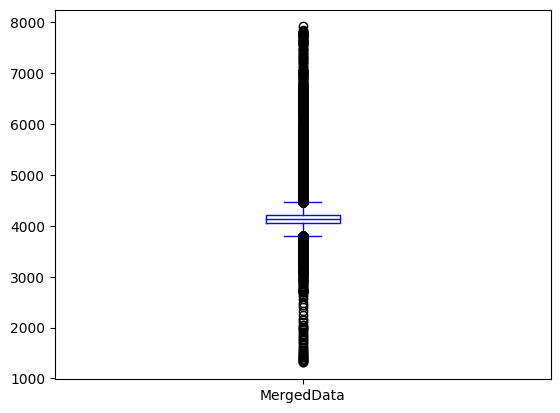

In [17]:
merged_df.plot(kind='box',x='AF3',y='F3',color='blue', label='MergedData')

In [18]:
m_df=merged_df[merged_df['AF4']>=40][0:200]
m_df

,AF3,AF4,F3,F4,F7,F8,FC5,FC6,O1,O2,...,CQ_P7,CQ_P8,CQ_F4,CQ_AF3,CQ_FC5,CQ_O1,CQ_T8,CQ_F8,CQ_DRL,Class
0,4426.153846,3994.871795,4408.205128,3847.692308,4690.256410,3895.897436,4702.051282,3914.871795,4049.743590,4297.948718,...,4,4,4,4,4,4,4,4,4,2
1,4420.512821,3986.666667,4394.358974,3836.923077,4678.461538,3886.666667,4696.410256,3910.769231,4054.358974,4295.897436,...,4,4,4,4,4,4,4,4,4,2
2,4413.846154,3986.153846,4386.666667,3831.794872,4654.871795,3881.025641,4690.769231,3908.205128,4066.666667,4301.025641,...,4,4,4,4,4,4,4,4,4,2
3,4407.692308,3984.615385,4384.102564,3832.820513,4644.615385,3883.076923,4686.153846,3910.256410,4063.076923,4298.974359,...,4,4,4,4,4,4,4,4,4,2
4,4407.179487,3978.974359,4382.564103,3832.307692,4647.692308,3878.974359,4685.641026,3903.076923,4057.948718,4295.384615,...,4,4,4,4,4,4,4,4,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,4207.179487,3822.051282,4153.333333,3664.102564,4460.000000,3672.307692,4573.846154,3740.512821,4106.153846,4122.564103,...,4,4,4,4,4,4,4,4,4,2
196,4212.820513,3836.923077,4155.897436,3674.358974,4464.615385,3685.128205,4571.282051,3757.948718,4114.871795,4138.461538,...,4,4,4,4,4,4,4,4,4,2
197,4217.435897,3846.153846,4155.897436,3683.589744,4521.025641,3705.128205,4570.256410,3773.333333,4118.974359,4141.025641,...,4,4,4,4,4,4,4,4,4,2
198,4217.948718,3841.025641,4152.820513,3683.589744,4593.846154,3706.153846,4572.307692,3774.871795,4116.410256,4142.051282,...,4,4,4,4,4,4,4,4,4,2


In [19]:
AF3 = merged_df['AF3']
F3 = merged_df['F3']

<BarContainer object of 100 artists>

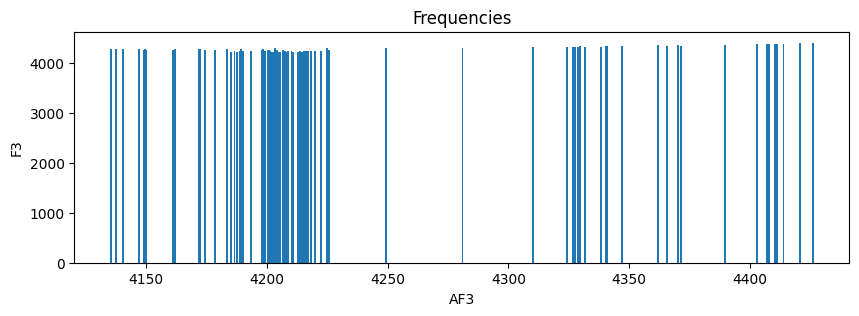

In [20]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize = (10, 3))
plt.xlabel("AF3")
plt.ylabel("F3")
plt.title("Frequencies")
plt.bar(AF3[0:100], F3[0:100])

In [21]:
#6. Identifying Unwanted rows
merged_df.dtypes

AF3             float64
AF4             float64
F3              float64
F4              float64
F7              float64
F8              float64
FC5             float64
FC6             float64
O1              float64
O2              float64
P7              float64
P8              float64
T7              float64
T8              float64
COUNTER           int64
INTERPOLATED      int64
GYROX             int64
GYROY             int64
RAW_CQ            int64
CQ_CMS            int64
CQ_F7             int64
CQ_T7             int64
CQ_O2             int64
CQ_FC6            int64
CQ_AF4            int64
CQ_F3             int64
CQ_P7             int64
CQ_P8             int64
CQ_F4             int64
CQ_AF3            int64
CQ_FC5            int64
CQ_O1             int64
CQ_T8             int64
CQ_F8             int64
CQ_DRL            int64
Class             int64
dtype: object

In [22]:
merged_df.columns

Index(['AF3', 'AF4', 'F3', 'F4', 'F7', 'F8', 'FC5', 'FC6', 'O1', 'O2', 'P7',
       'P8', 'T7', 'T8', 'COUNTER', 'INTERPOLATED', 'GYROX', 'GYROY', 'RAW_CQ',
       'CQ_CMS', 'CQ_F7', 'CQ_T7', 'CQ_O2', 'CQ_FC6', 'CQ_AF4', 'CQ_F3',
       'CQ_P7', 'CQ_P8', 'CQ_F4', 'CQ_AF3', 'CQ_FC5', 'CQ_O1', 'CQ_T8',
       'CQ_F8', 'CQ_DRL', 'Class'],
      dtype='object')

In [23]:
updated_df=merged_df[['AF3', 'AF4', 'F3', 'F4', 'F7', 'F8', 'FC5', 'FC6', 'O1', 'O2', 'P7',
       'P8', 'T7', 'T8', 'COUNTER', 'INTERPOLATED', 'GYROX', 'GYROY', 'RAW_CQ',
       'CQ_CMS', 'CQ_F7', 'CQ_T7', 'CQ_O2', 'CQ_FC6', 'CQ_AF4', 'CQ_F3',
       'CQ_P7', 'CQ_P8', 'CQ_F4', 'CQ_AF3', 'CQ_FC5', 'CQ_O1', 'CQ_T8',
       'CQ_F8', 'CQ_DRL']]

In [24]:
X=np.asarray(updated_df)

#dependent variable
y=np.asarray(merged_df['Class'])
X[0:5]

array([[4.42615385e+03, 3.99487180e+03, 4.40820513e+03, 3.84769231e+03,
        4.69025641e+03, 3.89589744e+03, 4.70205128e+03, 3.91487180e+03,
        4.04974359e+03, 4.29794872e+03, 4.18615385e+03, 4.13282051e+03,
        4.10666667e+03, 4.07641026e+03, 2.80000000e+01, 0.00000000e+00,
        1.55500000e+03, 1.75100000e+03, 0.00000000e+00, 4.00000000e+00,
        4.00000000e+00, 4.00000000e+00, 4.00000000e+00, 4.00000000e+00,
        4.00000000e+00, 4.00000000e+00, 4.00000000e+00, 4.00000000e+00,
        4.00000000e+00, 4.00000000e+00, 4.00000000e+00, 4.00000000e+00,
        4.00000000e+00, 4.00000000e+00, 4.00000000e+00],
       [4.42051282e+03, 3.98666667e+03, 4.39435897e+03, 3.83692308e+03,
        4.67846154e+03, 3.88666667e+03, 4.69641026e+03, 3.91076923e+03,
        4.05435897e+03, 4.29589744e+03, 4.18717949e+03, 4.12666667e+03,
        4.10564103e+03, 4.06512820e+03, 2.90000000e+01, 0.00000000e+00,
        1.55500000e+03, 1.75500000e+03, 0.00000000e+00, 4.00000000e+00,
       

In [25]:

from sklearn.model_selection import train_test_split
train_test_split(X,y)

[array([[4.09128205e+03, 3.83128205e+03, 4.09538461e+03, ...,
         4.00000000e+00, 4.00000000e+00, 4.00000000e+00],
        [4.80256410e+03, 3.80000000e+03, 4.48717949e+03, ...,
         4.00000000e+00, 4.00000000e+00, 4.00000000e+00],
        [4.15384615e+03, 3.90051282e+03, 4.27025641e+03, ...,
         4.00000000e+00, 4.00000000e+00, 4.00000000e+00],
        ...,
        [4.07333333e+03, 3.76717949e+03, 4.07538461e+03, ...,
         4.00000000e+00, 4.00000000e+00, 4.00000000e+00],
        [4.20000000e+03, 3.89692308e+03, 4.19538461e+03, ...,
         4.00000000e+00, 4.00000000e+00, 4.00000000e+00],
        [3.93692308e+03, 3.72051282e+03, 4.01230769e+03, ...,
         4.00000000e+00, 4.00000000e+00, 4.00000000e+00]]),
 array([[4.02564103e+03, 3.76205128e+03, 4.03076923e+03, ...,
         4.00000000e+00, 4.00000000e+00, 4.00000000e+00],
        [4.23641026e+03, 3.92769231e+03, 4.35384615e+03, ...,
         4.00000000e+00, 4.00000000e+00, 4.00000000e+00],
        [4.11384615e+03, 

In [26]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=4)

In [28]:
from sklearn import svm
svm_classifier=svm.SVC(kernel='linear',gamma='auto',C=2) 
svm_classifier.fit(x_train,y_train)


SVC(C=2, gamma='auto', kernel='linear')

In [29]:
y_predict=svm_classifier.predict(x_test)
y_predict

array([2, 2, 2, ..., 2, 4, 2], dtype=int64)

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           2       0.93      0.97      0.95      7671
           4       0.97      0.93      0.95      7689

    accuracy                           0.95     15360
   macro avg       0.95      0.95      0.95     15360
weighted avg       0.95      0.95      0.95     15360



In [32]:
from sklearn import metrics
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, y_predict))

Confusion matrix:
[[7423  248]
 [ 574 7115]]


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


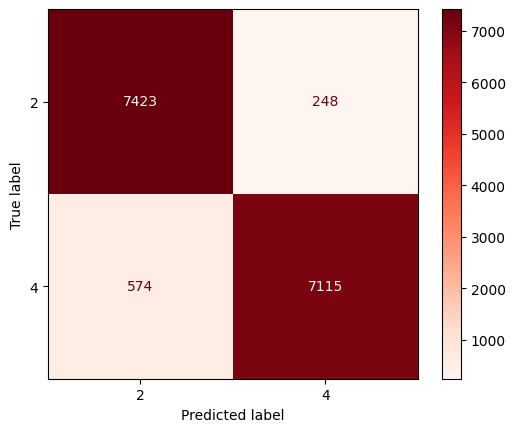

In [39]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC

plot_confusion_matrix(svm_classifier, x_test, y_test, cmap=plt.cm.Reds)  
plt.show()  